In [11]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import datetime
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

In [12]:
mypath = "../data/revisions/"
file = "rev_kash_ur_27-10-2019 21-52-30.json"

with open(mypath + file) as thefile:
        data = json.load(thefile)
        df = pd.DataFrame(data)

In [13]:
df['timestamp'] = df['timestamp'].astype(str)
df.timestamp=df.timestamp.str.replace("T"," ")
df.timestamp=df.timestamp.str.replace("Z","")
# df.to_csv(r'kash_hi.csv')
print(df[:3])

           user  anon            timestamp  size  \
0  103.255.6.68  True  2019-09-01 06:05:52  7199   
1     امین اکبر   NaN  2019-08-22 12:42:15  7196   
2   103.7.77.73  True  2019-08-14 12:02:55  7056   

                                             comment  
0  /* مئلہ کشمیر پر اقوام متحدہ کی ثالثی */ Fixed...  
1                                                     
2                          1971 کی جنگ کا زکر نہ تھا  


In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['size'] = pd.to_numeric(df['size'])
df.dtypes
df = df.set_index('timestamp')

In [15]:
# df = df.set_index('timestamp')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.weekday_name
df.dtypes
df.head(3)

,user,anon,size,comment,year,month,day
timestamp,,,,,,,
2019-09-01 06:05:52,103.255.6.68,True,7199,/* مئلہ کشمیر پر اقوام متحدہ کی ثالثی */ Fixed...,2019,9,Sunday
2019-08-22 12:42:15,امین اکبر,NaN,7196,,2019,8,Thursday
2019-08-14 12:02:55,103.7.77.73,True,7056,1971 کی جنگ کا زکر نہ تھا,2019,8,Wednesday


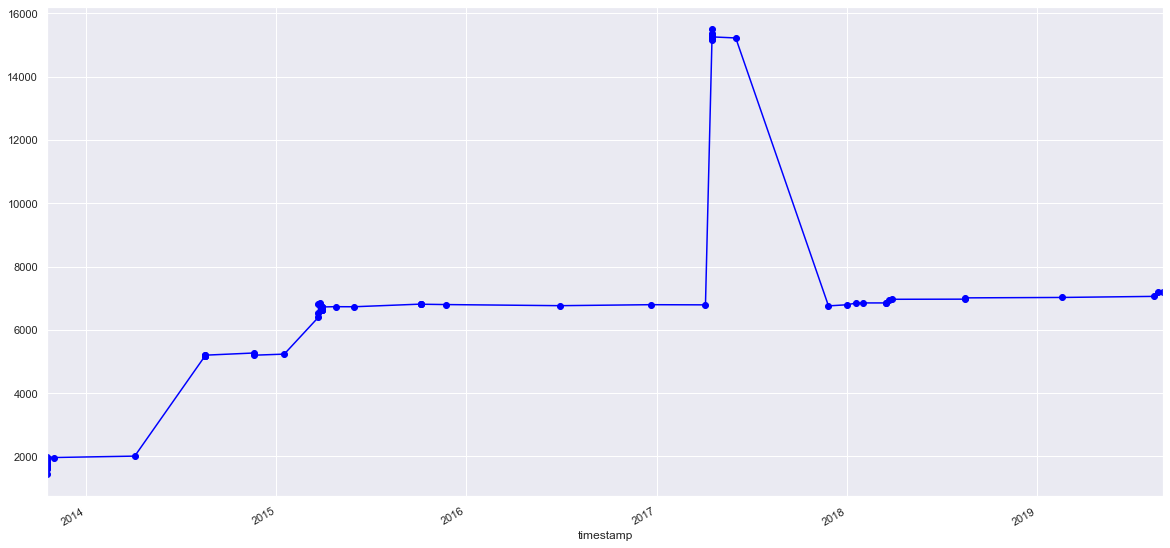

In [16]:
df['size'].plot(marker='o', linestyle='-', linewidth=1.5, color = 'blue')

In [17]:
# df = df.drop(['user', 'anon', 'slots','comment'], axis=1)
df.dtypes
df.to_csv(r'kash_ur.csv')